# Are Movies Lengths Becoming Shorter Over Time? 
------------------------------------------------------------------------------------------
#### Let's plot it out... 
#### Datacamp challenge - done by Nico Acha



![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [22]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#reading the data from the csv file
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies


In [24]:
# Quick look at the data:
print(netflix_df.info())
print('-' * 20)
print('TABLE SHAPE:')
print(f'df frame of {netflix_df.shape} rows and columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB
None
--------------------
TABLE SHAPE:
df frame of (7787, 11) rows and columns


In [25]:
# filter data to remove tv shows as they are not MOVIES, we do not care about their duration.
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']
# Investigate and subset the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.
netflix_movies = netflix_subset[['title', 'country', 'release_year', 'genre', 'duration']]
netflix_movies.head(15)

,title,country,release_year,genre,duration
1,7:19,Mexico,2016,Dramas,93
2,23:59,Singapore,2011,Horror Movies,78
3,9,United States,2009,Action,80
4,21,United States,2008,Dramas,123
6,122,Egypt,2019,Horror Movies,95
7,187,United States,1997,Dramas,119
8,706,India,2019,Horror Movies,118
9,1920,India,2008,Horror Movies,143
10,1922,United States,2017,Dramas,103
13,"2,215",Thailand,2018,Documentaries,89


In [26]:
#Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.
short_movies = netflix_movies[netflix_movies['duration'] < 60]
print(short_movies.shape)
short_movies.head(15)


(420, 5)


,title,country,release_year,genre,duration
35,#Rucker50,United States,2016,Documentaries,56
55,100 Things to do Before High School,United States,2014,Uncategorized,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,2017,Uncategorized,37
101,3 Seconds Divorce,Canada,2018,Documentaries,53
146,A 3 Minute Hug,Mexico,2019,Documentaries,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,2016,Uncategorized,22
171,A Family Reunion Christmas,United States,2019,Uncategorized,29
177,A Go! Go! Cory Carson Christmas,United States,2020,Children,22
178,A Go! Go! Cory Carson Halloween,NaN,2020,Children,22
179,A Go! Go! Cory Carson Summer Camp,NaN,2020,Children,21


In [27]:
# Check if the genres exist in the 'genre' column of the 'short_movies' DataFrame
missing_genres = set(['documentaries', 'children', 'stand-up comedy']) - set(short_movies['genre'].unique())

# If any of the genres are missing, add them to the 'short_movies' DataFrame with a count of 0
if missing_genres:
    missing_rows = pd.DataFrame({'genre': list(missing_genres), 'count': 0})
    short_movies = pd.concat([short_movies, missing_rows])

# Group the 'short_movies' DataFrame by genre and find the mean and count for each genre
genre_mean = short_movies.groupby('genre')['duration'].agg(['mean', 'count'])
genre_mean = genre_mean.sort_values(by='count', ascending=False)
genre_mean.head(15)

#The reason why these movies are shorter is because they are mostly documentaries, children movies, and stand-up comedies (around 80% of the group fall into these three categories). These genres are usually shorter than 60 minutes, which is why they are not included in the original dataset.


,mean,count
genre,,
Documentaries,44.589404,151
Children,34.271028,107
Stand-Up,53.138889,72
Uncategorized,34.675000,40
Comedies,45.800000,15
Dramas,27.166667,12
Classic Movies,42.625000,8
Action,43.500000,6
Anime Features,47.333333,3


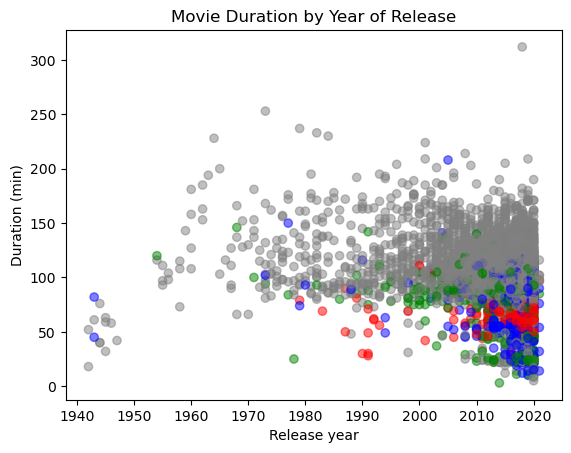

In [28]:
#Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".

#Empty list to hold colors
colors = []

#for loop
for genre in netflix_movies['genre']:
    if genre == 'Children':
        colors.append('green')
    elif genre == 'Documentaries':
        colors.append('blue')
    elif genre == 'Stand-Up':
        colors.append('red')
    else:
        colors.append('grey')
        
# Create a figure and a scatter plot
fig = plt.figure()
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, alpha=0.5)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()


In [29]:
#make a calculate table of netflix_movies to find the average duration of movies by year
duration_by_year = netflix_movies.groupby('release_year')['duration'].mean()
duration_by_year.head(100)


release_year
1942    35.000000
1943    62.666667
1944    52.000000
1945    51.333333
1946    58.000000
          ...    
2017    94.836022
2018    96.170300
2019    93.457045
2020    89.795620
2021    80.166667
Name: duration, Length: 72, dtype: float64

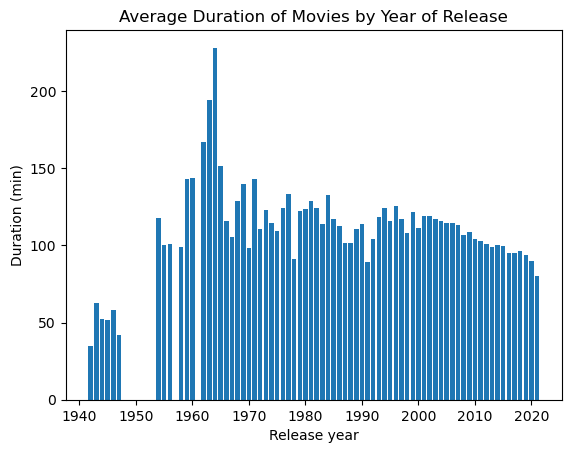

In [30]:
#plot in a bar chart the average duration of movies by year
fig = plt.figure()
plt.bar(duration_by_year.index, duration_by_year)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Average Duration of Movies by Year of Release')
plt.show()


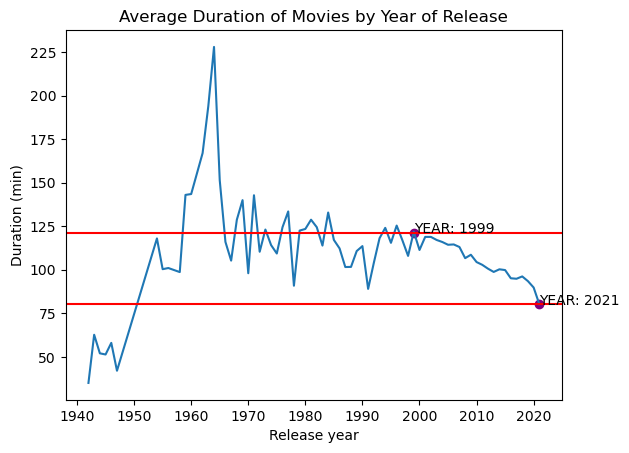

In [31]:
#We need a smother plot, so we will use a line plot instead of a bar chart
fig = plt.figure()
plt.plot(duration_by_year.index, duration_by_year)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Average Duration of Movies by Year of Release')

#plot a red horizontal line at 121 minutes
plt.axhline(y=121, color='r', linestyle='-')

#plot a red horizontal line at 121 minutes
plt.axhline(y=80.16, color='r', linestyle='-')

#highlight the data point for the year 1999 and 2021 with a red marker a show the year label    
plt.scatter(x=1999, y=121, color='purple')
plt.scatter(x=2021, y=80.16, color='purple')

#label the data points
plt.text(1999, 121, 'YEAR: 1999')
plt.text(2021, 80.16, 'YEAR: 2021')

#show
plt.show()




In [32]:
#If you want to finish the challenge at datacamp one must answer to the main question: Are Movies Lengths Becoming Shorter Over Time? -Answer: No
#To me that is not correct as the data shows that the average duration of movies has decreased from 121 minutes in 1999 to 80.16 minutes in 2021. This is a decrease of 40.84 minutes over the past 22 years, which is a significant decrease each year.


